# A/B Test Power Analysis Calculator

This notebook demonstrates how to use the power analysis calculator to plan A/B testing experiments.

## Key Questions Answered:
- What sample size do I need for a given effect size?
- How long will my test take to run?
- What's the smallest effect I can detect with my traffic?
- What are the trade-offs between test duration and sensitivity?


In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from power_analysis_calculator import PowerAnalysisCalculator

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]


## Scenario 1: E-commerce Conversion Rate Optimization

You want to test a new checkout flow. Current conversion rate is 3%, and you get 20,000 visitors per month.


In [13]:
# Create calculator for e-commerce scenario
ecommerce_calculator = PowerAnalysisCalculator(
    baseline_rate=0.03,       # 3% conversion rate
    monthly_population=20000, # 20K monthly visitors
    num_variants=2,           # A/B test (control + treatment)
    power=0.8,               # 80% power
    alpha=0.05               # 95% confidence
)

# Calculate power analysis
ecommerce_results = ecommerce_calculator.calculate_power_analysis()

# Display results
ecommerce_calculator.display_results(top_n=15)


A/B TEST POWER ANALYSIS RESULTS
Input Parameters:
  Baseline Conversion Rate: 3.0%
  Monthly Population: 20,000
  Number of Variants: 2
  Statistical Power: 80.0%
  Significance Level: 5.0%
--------------------------------------------------------------------------------
MDE    Sample/Var   Total      Pop %    Days     Weeks    Feasibility 
--------------------------------------------------------------------------------
  1%      4,569      9,138    45.7%    13.7     2.0   Short       
  2%      1,143      2,286    11.4%     3.4     0.5   Very Short  
  3%        508      1,016     5.1%     1.5     0.2   Very Short  
  4%        286        572     2.9%     0.9     0.1   Very Short  
  5%        183        366     1.8%     0.6     0.1   Very Short  
  6%        127        254     1.3%     0.4     0.1   Very Short  
  7%         94        188     0.9%     0.3     0.0   Very Short  
  8%         72        144     0.7%     0.2     0.0   Very Short  
  9%         57        114     0.6%     0

RECOMMENDATIONS FOR E-COMMERCE SCENARIO

Quick Test:
  MDE: 30%
  Duration: 0.0 days
  Sample Size: 12

Standard Test:
  MDE: 1%
  Duration: 13.7 days
  Sample Size: 9,138

Sensitive Test:
  MDE: 1%
  Duration: 13.7 days
  Sample Size: 9,138


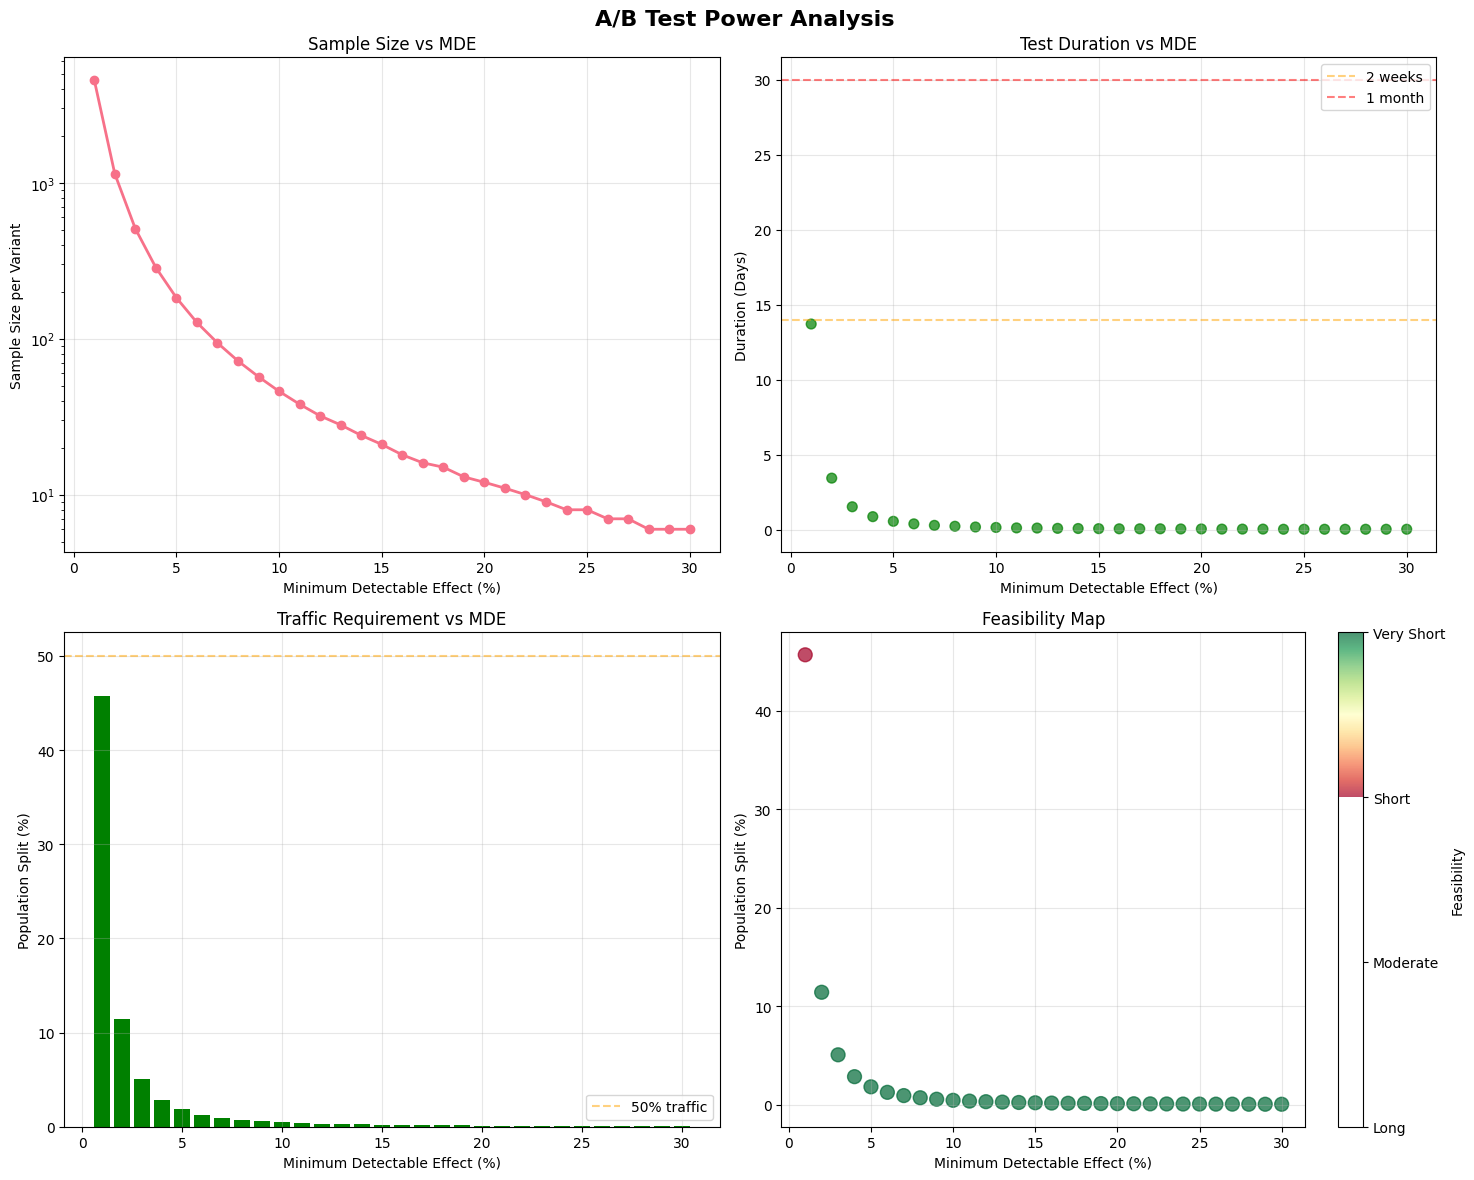

In [14]:
# Get recommendations
ecommerce_recs = ecommerce_calculator.get_recommendations()

print("RECOMMENDATIONS FOR E-COMMERCE SCENARIO")
print("="*50)

for test_type, rec in ecommerce_recs.items():
    if rec:
        print(f"\n{test_type.replace('_', ' ').title()}:")
        print(f"  MDE: {rec['mde']}%")
        print(f"  Duration: {rec['duration']:.1f} days")
        print(f"  Sample Size: {rec['sample_size']:,}")

# Visualize the power analysis
ecommerce_calculator.plot_power_curve()
